In [1]:
from transformers import ViTImageProcessor, ViTForImageClassification
from datasets import load_dataset
import torch

path = "/mnt/c/Users/music/project/SkinClassification/google-vit-base-patch16-224-ISICmod-19k/10epcoh"
model300 = ViTForImageClassification.from_pretrained(path)
feature_extractor300 = ViTImageProcessor.from_pretrained(path)

/home/music/mambaforge/envs/langchain/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-08-17 22:37:51.061519: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-17 22:37:51.481158: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-17 22:37:51.483601: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-17 22:37:54.176215: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
from PIL import Image
image = Image.open("ISIC_0010512.jpg")
inputs = feature_extractor300(images=image, return_tensors="pt")
outputs = model300(**inputs)
logits = outputs.logits
print("logits : ",logits)
predicted_class = torch.argmax(logits, dim=1).item()
predicted_class

logits :  tensor([[-3.1684,  3.4631,  6.3503, -1.9979, -3.2151, -3.6998, -1.2976]],
       grad_fn=<AddmmBackward0>)


2

In [5]:
from PIL import Image
import os
import numpy as np

# Define the folder path
folder_path = "/mnt/c/Users/music/project/SkinClassification/test"

# Loop through all files in the folder
# for folder_name in os.listdir(folder_path):
full_name = os.path.join(folder_path,"Normal")
for file_name in os.listdir(full_name):
    file_path = os.path.join(full_name, file_name)
    # Open the image file
    image = Image.open(file_path)
    img = np.array(image)
    if img.shape[2] == 4:
        print(file_path)
        img = img[:, :, :3]
        # Convert the image to RGB format
        image_rgb = Image.fromarray(img)
        # Do something with the RGB image, such as saving it or displaying it
        # For example, save it with a new name
        image_rgb.save(file_path)

In [6]:
dataset = load_dataset("imagefolder", data_dir="/mnt/c/Users/music/project/SkinClassification/test")
test_dataset = dataset["train"]

Computing checksums: 100%|██████████| 1950/1950 [00:05<00:00, 375.00it/s]
Extracting data files: 0it [00:00, ?it/s]
Generating train split: 1950 examples [00:00, 21064.74 examples/s]


In [7]:
# Define a function to perform inference on the ViT model
def predict_image_class(image):
    inputs = feature_extractor300(images=image, return_tensors="pt")
    with torch.no_grad():
        outputs = model300(**inputs)
        logits = outputs.logits
        predicted_class = torch.argmax(logits, dim=1).item()
    return predicted_class

# Test the model on the dataset
correct_predictions = 0
total_examples = len(test_dataset)
prediction = []
ground_truth = []
for example in test_dataset:
    image = example['image']
    true_label = example['label']
    predicted_class = predict_image_class(image)

    prediction.append(predicted_class)
    ground_truth.append(true_label)
    
    if predicted_class == true_label:
        correct_predictions += 1

accuracy = correct_predictions / total_examples
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.83


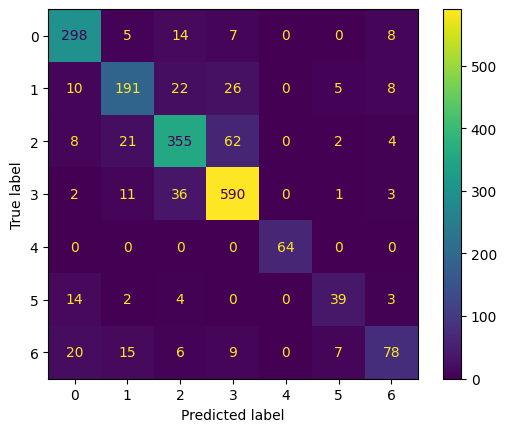

In [8]:
# Import matplotlib library
import matplotlib.pyplot as plt

# Import sklearn library
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Define the predicted and ground truth data as lists
predicted = prediction
ground_truth = ground_truth

# Define the classes as a list of integers from 0 to 6
classes = list(range(7))

# Compute the confusion matrix
cm = confusion_matrix(ground_truth, predicted)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot()
plt.show()


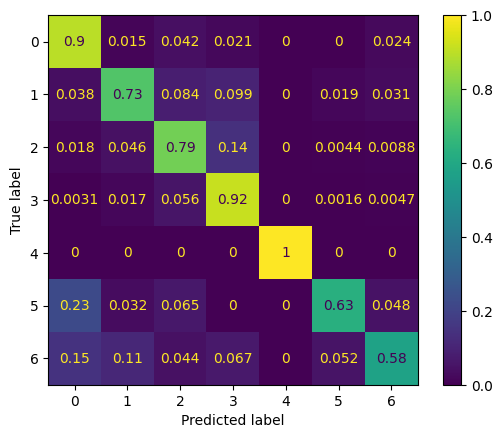

In [9]:
# Import matplotlib library
import matplotlib.pyplot as plt

# Import sklearn library
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Define the predicted and ground truth data as lists
predicted = prediction
ground_truth = ground_truth

# Define the classes as a list of integers from 0 to 6
classes = list(range(7))

# Compute the confusion matrix
cm = confusion_matrix(ground_truth, predicted)

# Normalize the confusion matrix by row sums
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot()
plt.show()
